## Section 1 - Setup
Mount Google Drive Folder, in order to access the CSV data file.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Section 2 - Data Loading
Now Google Drive is mounted & import Pandas. Now let's perform the operation by reading CSV file into pandas dataframe.

In [11]:
import pandas as pd
import seaborn as sns
path = "/content/drive/MyDrive/TrainingAndInternship/Forage-Cognizant_AI_Program/Task_1/Resources/sample_sales_data.csv"
df = pd.read_csv(path)
df.drop(columns = ["Unnamed: 0"], inplace = True, errors = 'ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [12]:
print(f' Rows : {df.shape[0]} \n Columns : {df.shape[1]}')
df.head()

 Rows : 7829 
 Columns : 9


,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [13]:
# Get data info

print(df.describe())
print('\n--------------------------------------------------------- \n \n')
print(df.info())

        unit_price     quantity        total
count  7829.000000  7829.000000  7829.000000
mean      7.819480     2.501597    19.709905
std       5.388088     1.122722    17.446680
min       0.190000     1.000000     0.190000
25%       3.990000     1.000000     6.570000
50%       7.190000     3.000000    14.970000
75%      11.190000     4.000000    28.470000
max      23.990000     4.000000    95.960000

--------------------------------------------------------- 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           

In [14]:
# Plotting function for continuos distribution

def plot_Bar(col_name, title=None, size=None):

    if title == None:
        title = col_name.upper().replace('_', ' ').replace(',', ' ')

    else:
        title = title.upper()

    if size == None:
        size = 10


    # No. of unique values in column
    uniq_vals = len(df[col_name].unique())

    # Amount of each unique value
    amt = df[col_name].value_counts()


    # Plot Graph

    graph = sns.displot(df,
                        x=col_name,
                        kde=True,
                        height=size,
                        aspect=size//(size/2)
                       )
    graph.set(title=f'Distribution of {title}')

    # Print Stats
    print(f'Found {uniq_vals} unique values and {amt.sum()} total values in {col_name}')

In [15]:
# Plotting function for catagorical distribution

def plot_Cat(df_name, col_name, title=None, size=None):

    if title == None:
        title = col_name.upper().replace('_', ' ').replace(',', ' ')

    else:
        title = title.upper()

    if size == None:
        size = 10

    # Plot Graph

    graph = sns.catplot(data = df_name,
                        x=col_name,
                        kind='count',
                        height=size,
                        aspect=size//(size/2)
                       )
    graph.set(title=f'Distribution of {title}' )

    # Print Stats
    print(f'{title} \n \n{df[col_name].value_counts()}')

Found 64 unique values and 7829 total values in unit_price
Found 4 unique values and 7829 total values in quantity
Found 256 unique values and 7829 total values in total
Found 5 unique values and 7829 total values in customer_type


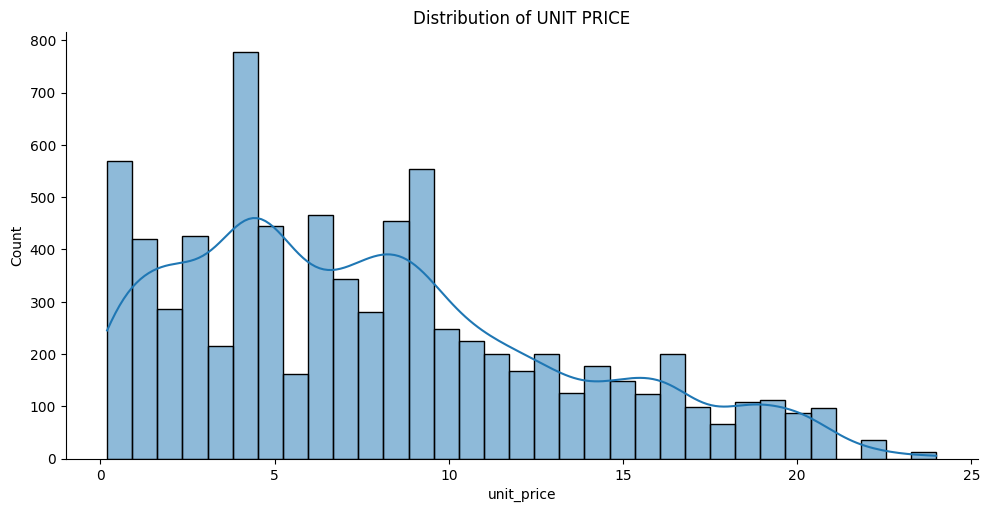

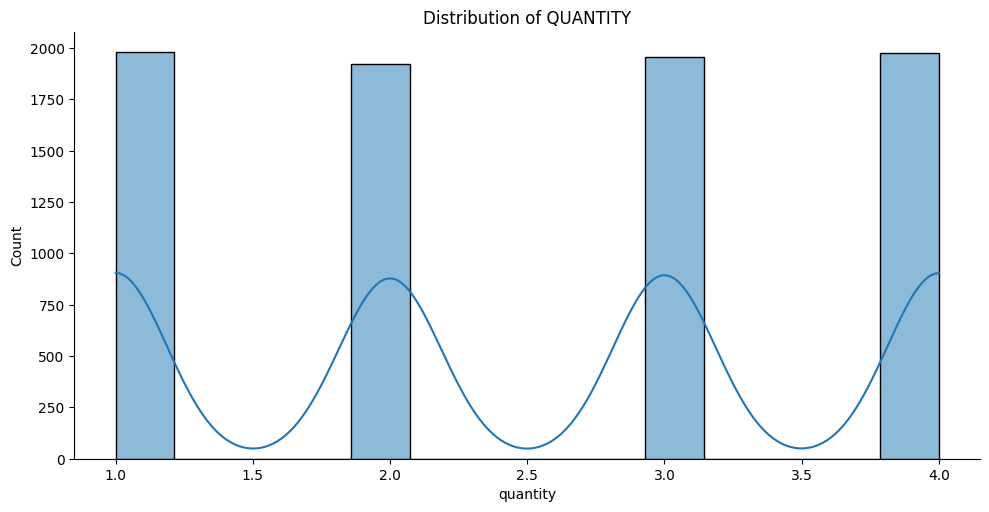

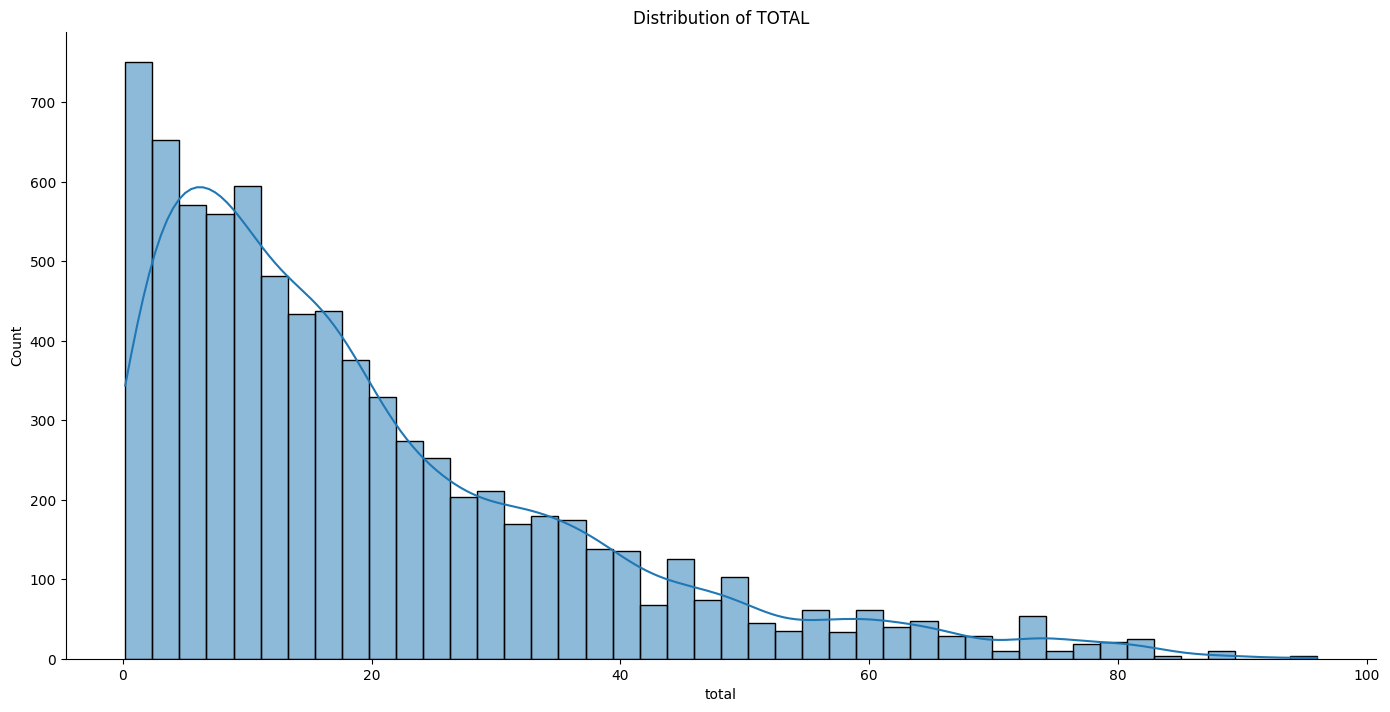

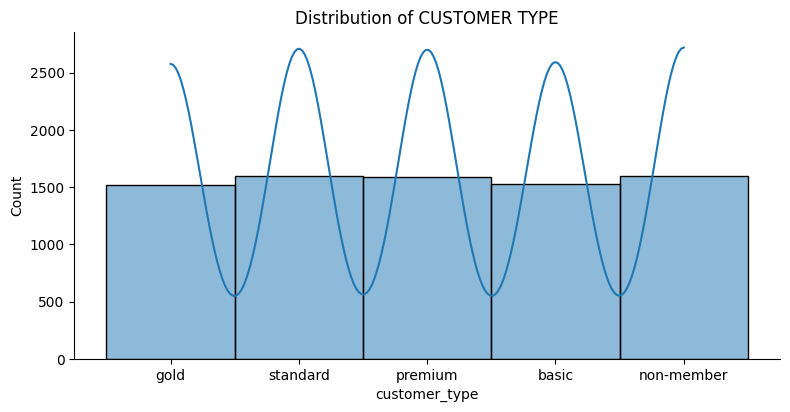

In [17]:
plot_Bar('unit_price', size=5)
plot_Bar('quantity', size=5)
plot_Bar('total', size=7)
plot_Bar('customer_type', size=4)

CATEGORY 
 
fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64


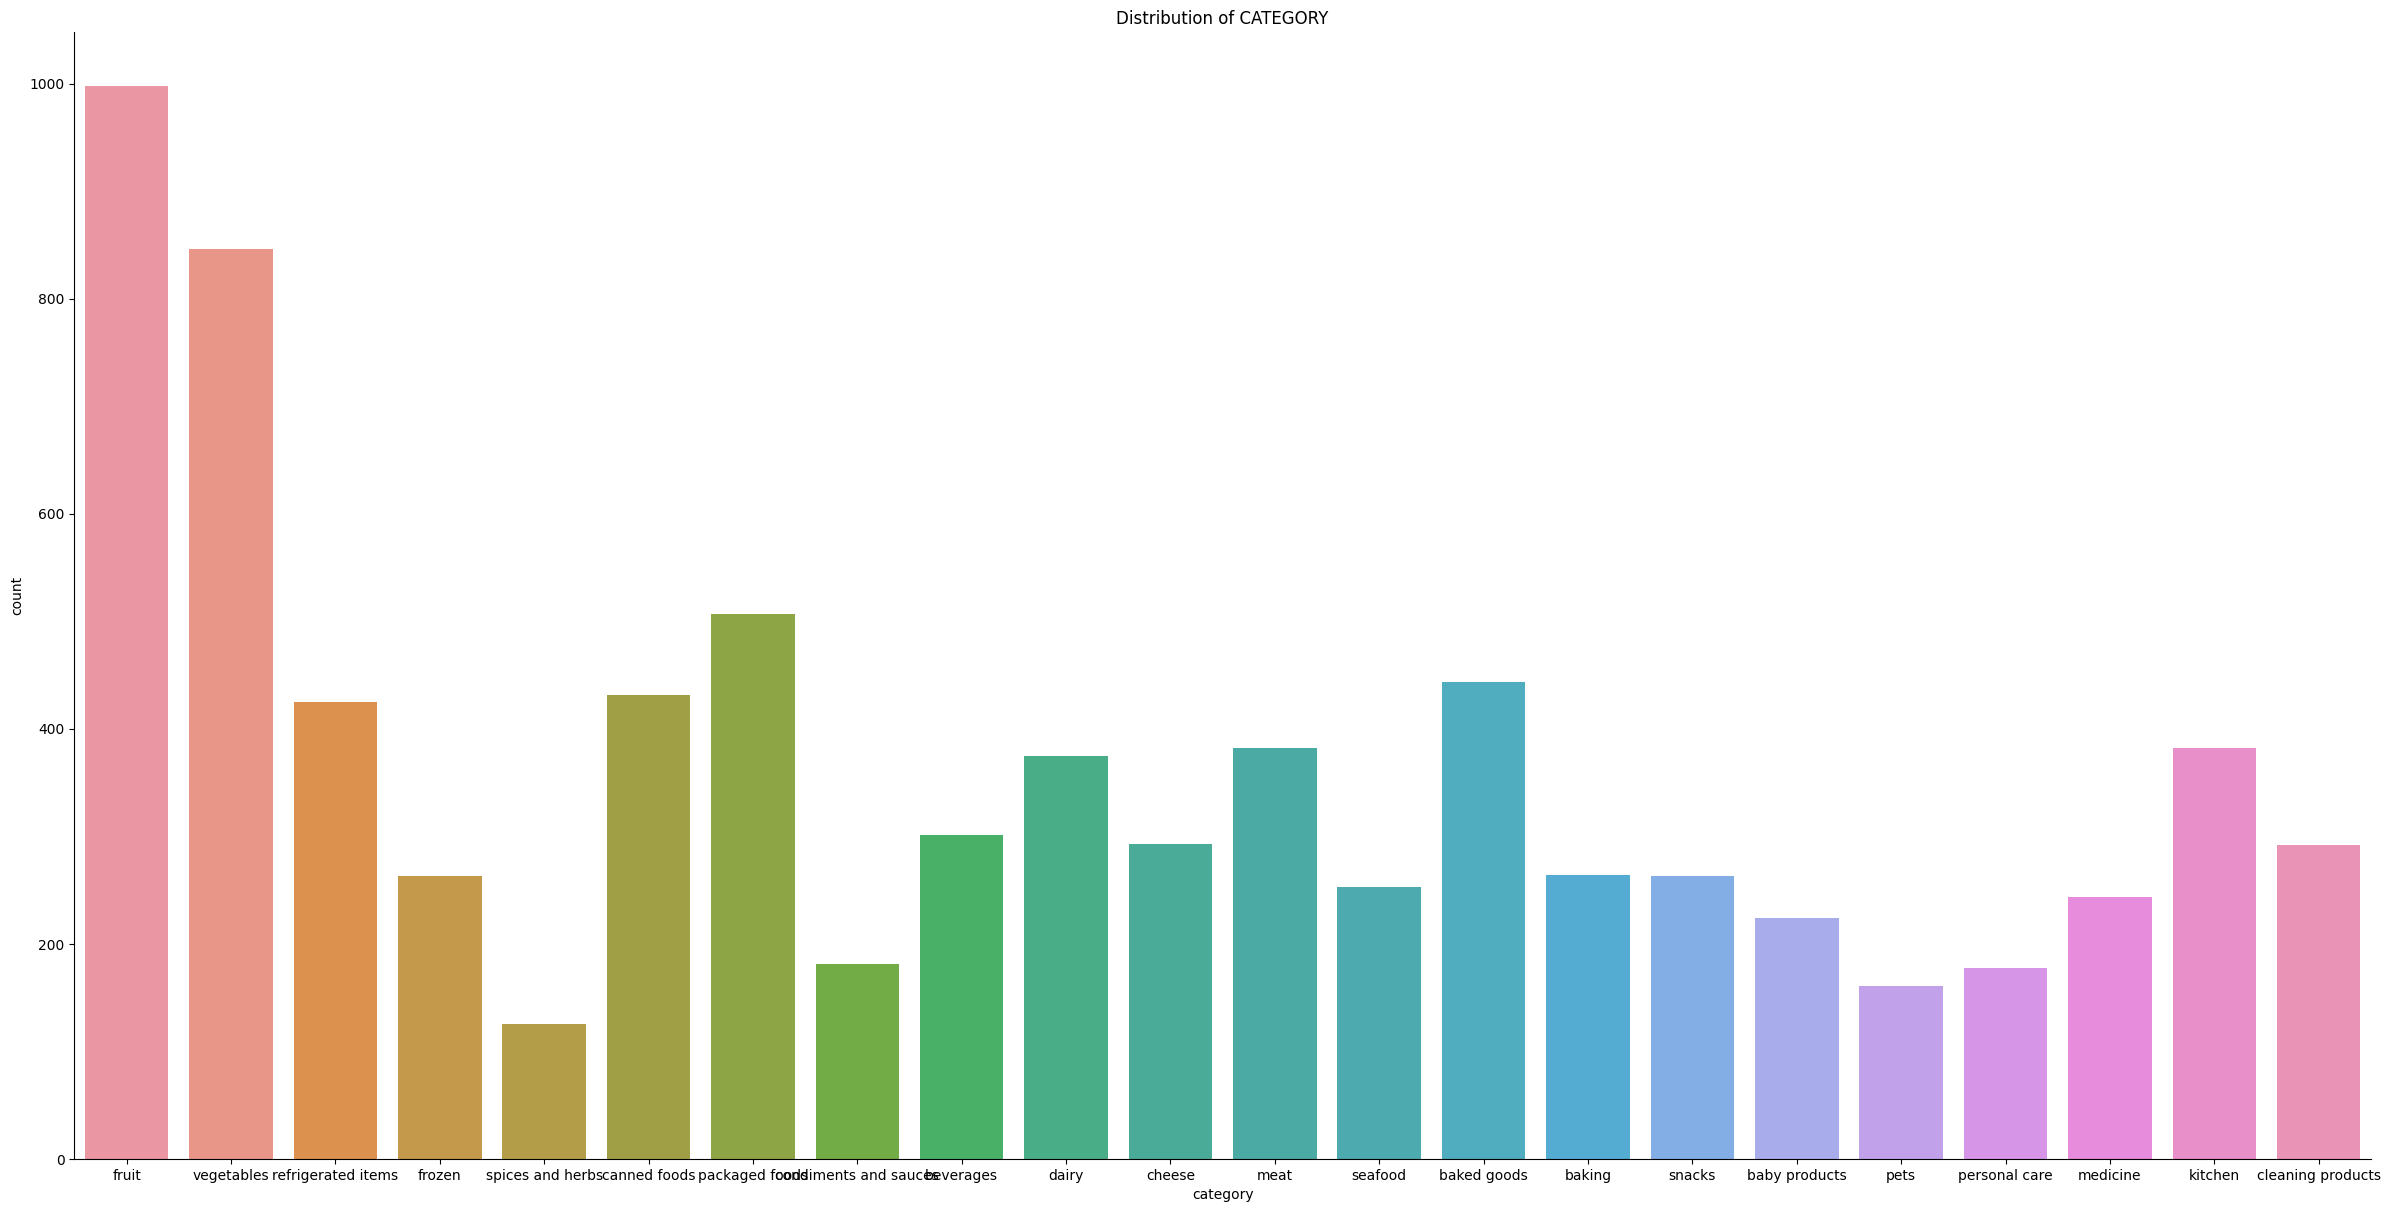

In [20]:
plot_Cat(df, 'category', size=12)

CUSTOMER TYPE 
 
non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: customer_type, dtype: int64


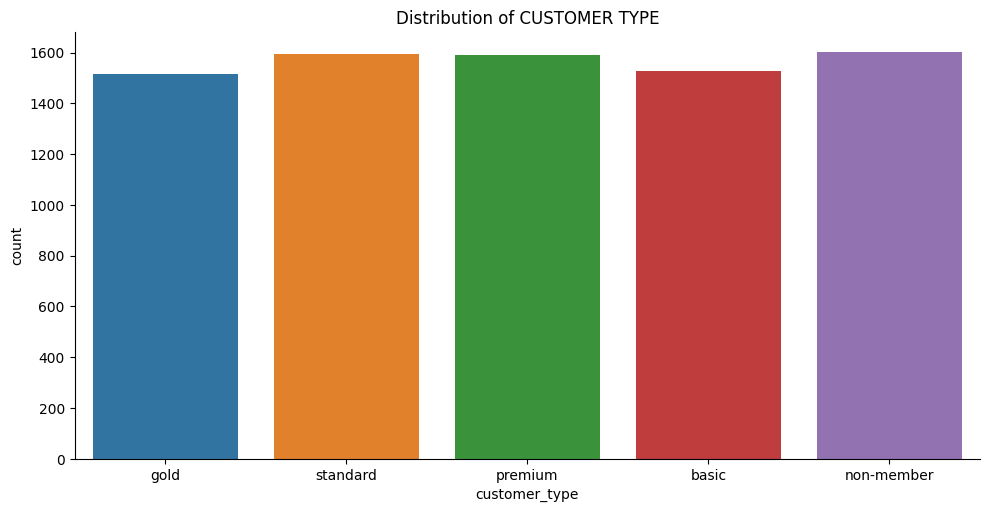

In [21]:
plot_Cat(df, 'customer_type', size=5)

PAYMENT TYPE 
 
cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: payment_type, dtype: int64


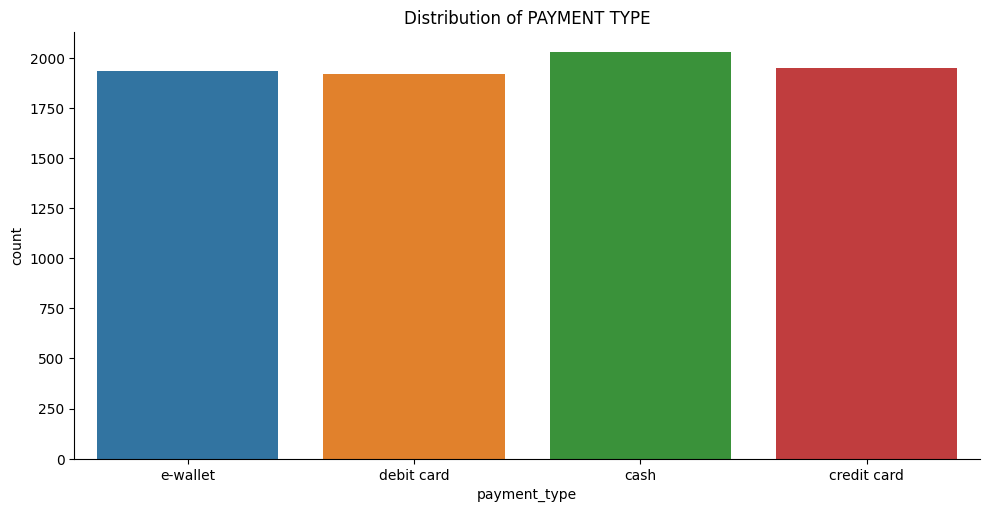

In [22]:
plot_Cat(df, 'payment_type', size=5)

In [24]:
# Check timestamp data format

print(type(df['timestamp']))
df.head(1)

<class 'pandas.core.series.Series'>


,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet


In [26]:
# Convert to timeseries

df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


In [27]:
# Separate time by hour

df['hour'] = df['timestamp'].dt.hour
df.head(1)

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,hour
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,9


In [28]:
# Check sales on hourly basis

hrs = df['hour'].value_counts()
print(f'Top 5 Sale Hours are \n\n{hrs[:5]}')

Top 5 Sale Hours are 

11    738
16    730
18    727
10    723
12    721
Name: hour, dtype: int64


HOURLY SALES 
 
11    738
16    730
18    727
10    723
12    721
9     718
19    709
14    702
17    699
13    693
15    669
Name: hour, dtype: int64


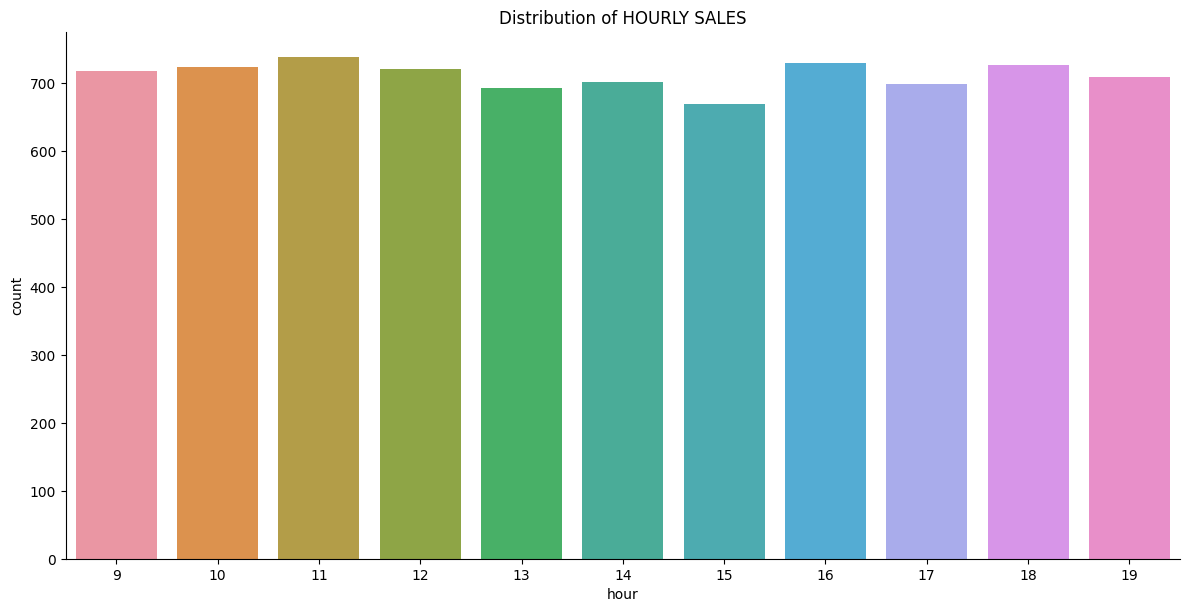

In [29]:
# Distribution of sales over the hours

plot_Cat(df, 'hour', size=6, title='Hourly Sales')

In [30]:
# Finding corelations

cor = df.corr()
cor.style.background_gradient(cmap='gray')

<ipython-input-30-581de3251cc5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


,unit_price,quantity,total,hour
unit_price,1.000000,0.024588,0.792018,0.010842
quantity,0.024588,1.000000,0.521926,-0.008410
total,0.792018,0.521926,1.000000,0.010354
hour,0.010842,-0.008410,0.010354,1.000000


[Text(0.5, 1.0, 'Distribution of Category')]

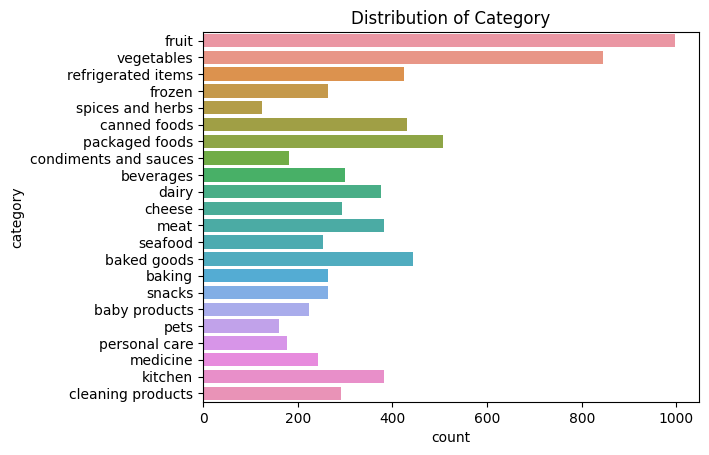

In [31]:
sns.countplot(df, y='category').set(title=f'Distribution of Category')

<ipython-input-33-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

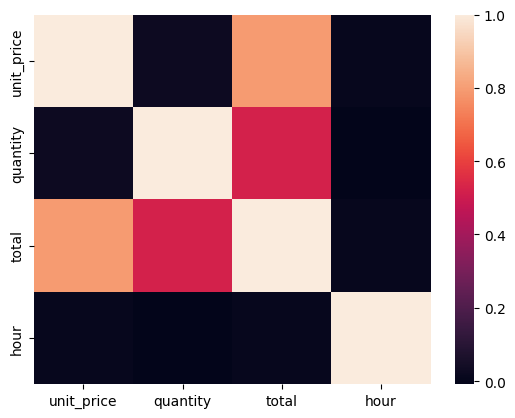

In [33]:
sns.heatmap(df.corr())